### Insurance (Linear Multiple regression)

Name: Sakar Gautam


ID: 2065882


Group: L5CG14


Assistant Module Leader: Anmol Adhikari


Module Leader: Siman Giri

# Multiple Linear Regression[17.5]:

### Predecting the insurance charges using linear multiple regression


https://www.kaggle.com/datasets/mirichoi0218/insurance

# Data Understanding, Cleaning and Transformation[2]:

## Overview

In this Task, we will be predicting the insurance charges from the insurance dataset with the features available with us. We're using the insurance dataset for this problem statement and we will be using concept of Multiple linear regression to predict the insurance charges. The insurer needs historical data to estimate each user's medical bills in order to create the finest medical insurance packages. A medical insurer can use this information to create pricing models that are more precise, anticipate specific insurance outcomes, or manage large portfolios. The goal in each of these situations is to precisely forecast insurance charges.

# Data Understanding

In this data understanding step, different techniques are used to better understand the dataset

Taking about this dataset, it is about the medical insurance records. The individual medical charges billed by health insurance are the target variable charges, and the rest of columns contains individual personal information such as age, sex, bmi, children, smoker and region.

These are the columns used in this dataset:

Age: This column gives the information about the individual age.

Sex: This column gives the gender of an individual.

Bmi: The body mass index is provided in this column, allowing readers to understand body weights that are excessive or low in relation to their height.

Children: This column gives the number of children covered by health insurance.

Smoker: This column gives that an individual smokes or not.

Region: This column gives information about the northeast, southeast, southwest, and northwest of the beneficiary's home country.

Charges: This column gives individual medical charges billed by health insurance.


This dataset has some problems that make it difficult to use, yet it can improve the financial performance of a health insurer.


### Objective

The main objective of this insurance dataset is to predict charges. The dataset consists of several prediction(Independent) variables and one target variable(charges).

The goal is to train an ML regression model that more accurately generates the desired charges. Metrics like the coefficient of determination and mean squared error are used to assess the model because it is a regression model problem.

### Importing Libraries

Importing the libraries In this first step, we will be importing the libraries required to build the ML model. The NumPy library, the matplotlib, the sklearn, the seaborn are imported. Additionally, we have imported the Pandas library for data analysis.

numpy -> for numerical calculations

pandas -> for reading csv file and processing it

seaborn -> for data visualization

matplotlib.pyplot -> for data visualization


In [253]:
import numpy as np # for carrying out the mathematical operations required by ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # to manage and prepare the dataset
import seaborn as sns # for visualization
import sklearn #for developing and evaluating models

### Importing the dataset

In [254]:
#connecting/mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
#Assigning the new variable 'path_datasets' and giving the path of dataset i.e insurance dataset
path_datasets = "/content/drive/MyDrive/AI final/4 .csv"

In [256]:
# Assigning new variable 'skr' for reading the dataset
skr = pd.read_csv(path_datasets)

# Analyzitation

In [257]:
#provides first 5 data
skr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [258]:
#provides the bottom 5 data
skr.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [259]:
#gives the random data from the dataset
skr.sample(5)

,age,sex,bmi,children,smoker,region,charges
1177,40,female,27.400,1,no,southwest,6496.88600
1303,43,male,27.800,0,yes,southwest,37829.72420
380,27,female,17.955,2,yes,northeast,15006.57945
264,53,female,38.060,3,no,southeast,20462.99766
1334,18,female,31.920,0,no,northeast,2205.98080


In [260]:
# Checking the shape of the dataset
skr.shape 

(1338, 7)

In [261]:
#checking the length of the dataset
len(skr)

1338

In [262]:
#displays the datatype of all the columns
skr.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [263]:
# Checking the information of the datasets
skr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [264]:
# statistical/numerical evaluation of the dataset
skr.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [265]:
# Dimensions of dataset
print('There are ',skr.shape[0],'rows and ',skr.shape[1],'columns in the dataset.') 

There are  1338 rows and  7 columns in the dataset.


There are no null values in the dataset

In [266]:
# from corr function we can find the correlation between the columns.
c = skr.corr()
c

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [267]:
a = skr.corr()['charges']
a
#this gives co-relation of the column associated with column charges which we are going to predict

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

The charges column, which is our target variable, can be assumed to have a direct link or correlation with all three columns.

### Numerical Features

In [268]:
#gives only the numerical features from the dataset
numeric_features=[features for features in skr.dtypes[skr.dtypes != 'object'].index]
numeric_features

['age', 'bmi', 'children', 'charges']

In [269]:
#gives the length of numerical features
len(numeric_features)

4

In [270]:
#summarize numerical features
skr[numeric_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Categorical Features

In [271]:
#gives only the categorical features from the dataset
cato_features=[features for features in skr.dtypes[skr.dtypes == 'object'].index]
cato_features

['sex', 'smoker', 'region']

In [272]:
#gives the length of categorical features
len(cato_features)

3

In [273]:
#summarize categorical features
skr[cato_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Unique Labels in Categorical features

In [274]:
#gives the unique labels of sex column
skr['sex'].unique()

array(['female', 'male'], dtype=object)

In [275]:
#prints the no of male and female of sex column
print(skr.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [276]:
#gives the unique labels of smoker column
skr['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [277]:
#prints the no of unique values of smoker column
print(skr.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [278]:
#gives the unique labels of region column
skr['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [279]:
#prints the no of unique values of region column
print(skr.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


# Data Cleaning

### Checking duplicate values

In [280]:
# Here, we're attempting to determine whether or not this dataset has any duplicate values.
print('There are',skr.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 1 duplicate values in the dateset.


In [281]:
skr = skr.drop_duplicates()

In [282]:
skr.shape

(1337, 7)

In [283]:
# Here, we're attempting to determine whether or not this dataset has any duplicate values.
print('There are',skr.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


### Checking null values

In [284]:
# Checking if there are any null values
skr.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [285]:
# Check for NULL values
skr.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values in the dataset.

# Data Analysis and Visualization[2.5]:

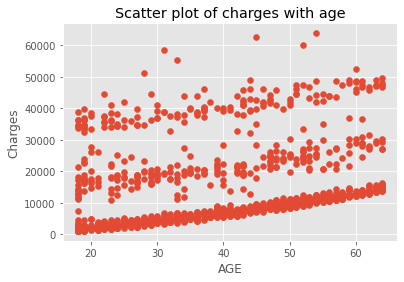

In [286]:
plt.scatter(skr['age'], skr['charges'])
plt.title('Scatter plot of charges with age') 
plt.xlabel('AGE')
plt.ylabel('Charges')
plt.show()

Here if the age increases then the charges also increases.

________________________________________________________________________________

creates the scatter plot by plotting the sex column on the x-axis and the charges column on the y-axis. 

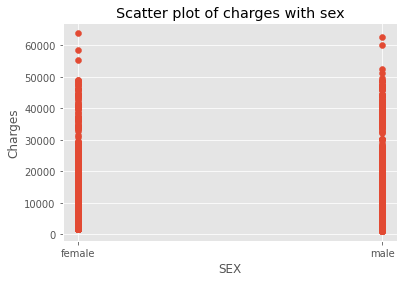

In [287]:
plt.scatter(skr['sex'], skr['charges'])
plt.title('Scatter plot of charges with sex') 
plt.xlabel('SEX')
plt.ylabel('Charges')
plt.show()

This scatter plot is used to look at the connection between insurance costs and sex. If there is a pattern or trend between sex and charges, such as if one sex tends to have higher charges than the other.

________________________________________________________________________________

 creates the histogram by using the hist() method on the sex column in the skr DataFrame.

Text(0.5, 1.0, 'Histogram of sex')

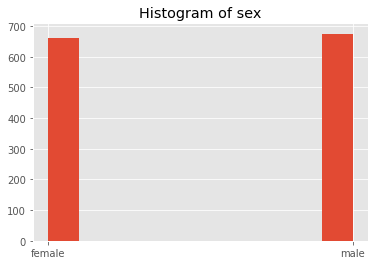

In [288]:
skr['sex'].hist()  
plt.title('Histogram of sex')


By seeing the above plot we can see that how sex is distributed throughout the dataset. The plot reveals whether one sex predominates over the other or whether the distribution of sexes is nearly equal. 

________________________________________________________________________________

 creates a scatter plot and shows the relationship between the region and charges columns in the skr DataFrame.

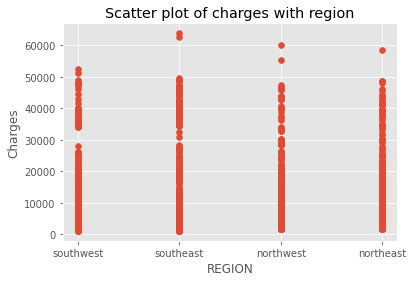

In [289]:
plt.scatter(skr['region'], skr['charges'])
plt.title('Scatter plot of charges with region') 
plt.xlabel('REGION')
plt.ylabel('Charges')
plt.show()

By visualizing the above plot we can can look into the connection between location and cost of insurance. If there is a pattern or trend between geography and charges, such as whether some locations often have larger charges than others.

________________________________________________________________________________

shows the distribution of the region column in the skr DataFrame.

Text(0.5, 1.0, 'Histogram of region')

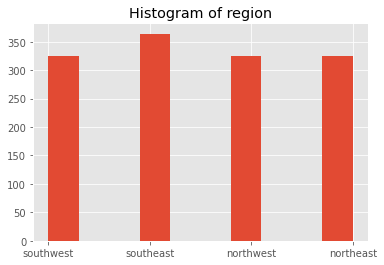

In [290]:
skr['region'].hist()  
plt.title('Histogram of region')


In general, the histogram is used to look into how the region column in the skr DataFrame is distributed. The graphic shows how the data is dispersed over various values of region. For example, you can see if the data is evenly distributed or if certain regions are more heavily represented in the data than others.

_______________________________________________________________________________

show the distribution of each numerical column in the skr DataFrame.

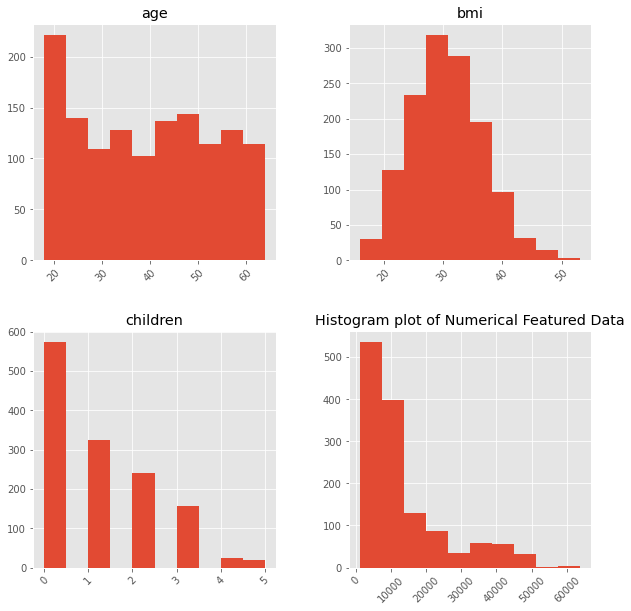

In [291]:
#Plot histogram grid
skr.hist(xrot=45, figsize=(10,10))
plt.title('Histogram plot of Numerical Featured Data')

plt.show()

Overall, the above distribution of each numerical column in the skr DataFrame are examined using this grid of histograms. The figure shows how each column is divided among various values, allowing you to spot any outliers, skewness, or trends in the data.

________________________________________________________________________________

shows the relationship between every pair of columns in the skr DataFrame, allowing us to visually explore the data and identify any patterns or correlations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0013d0fb20>,
      dtype=object)

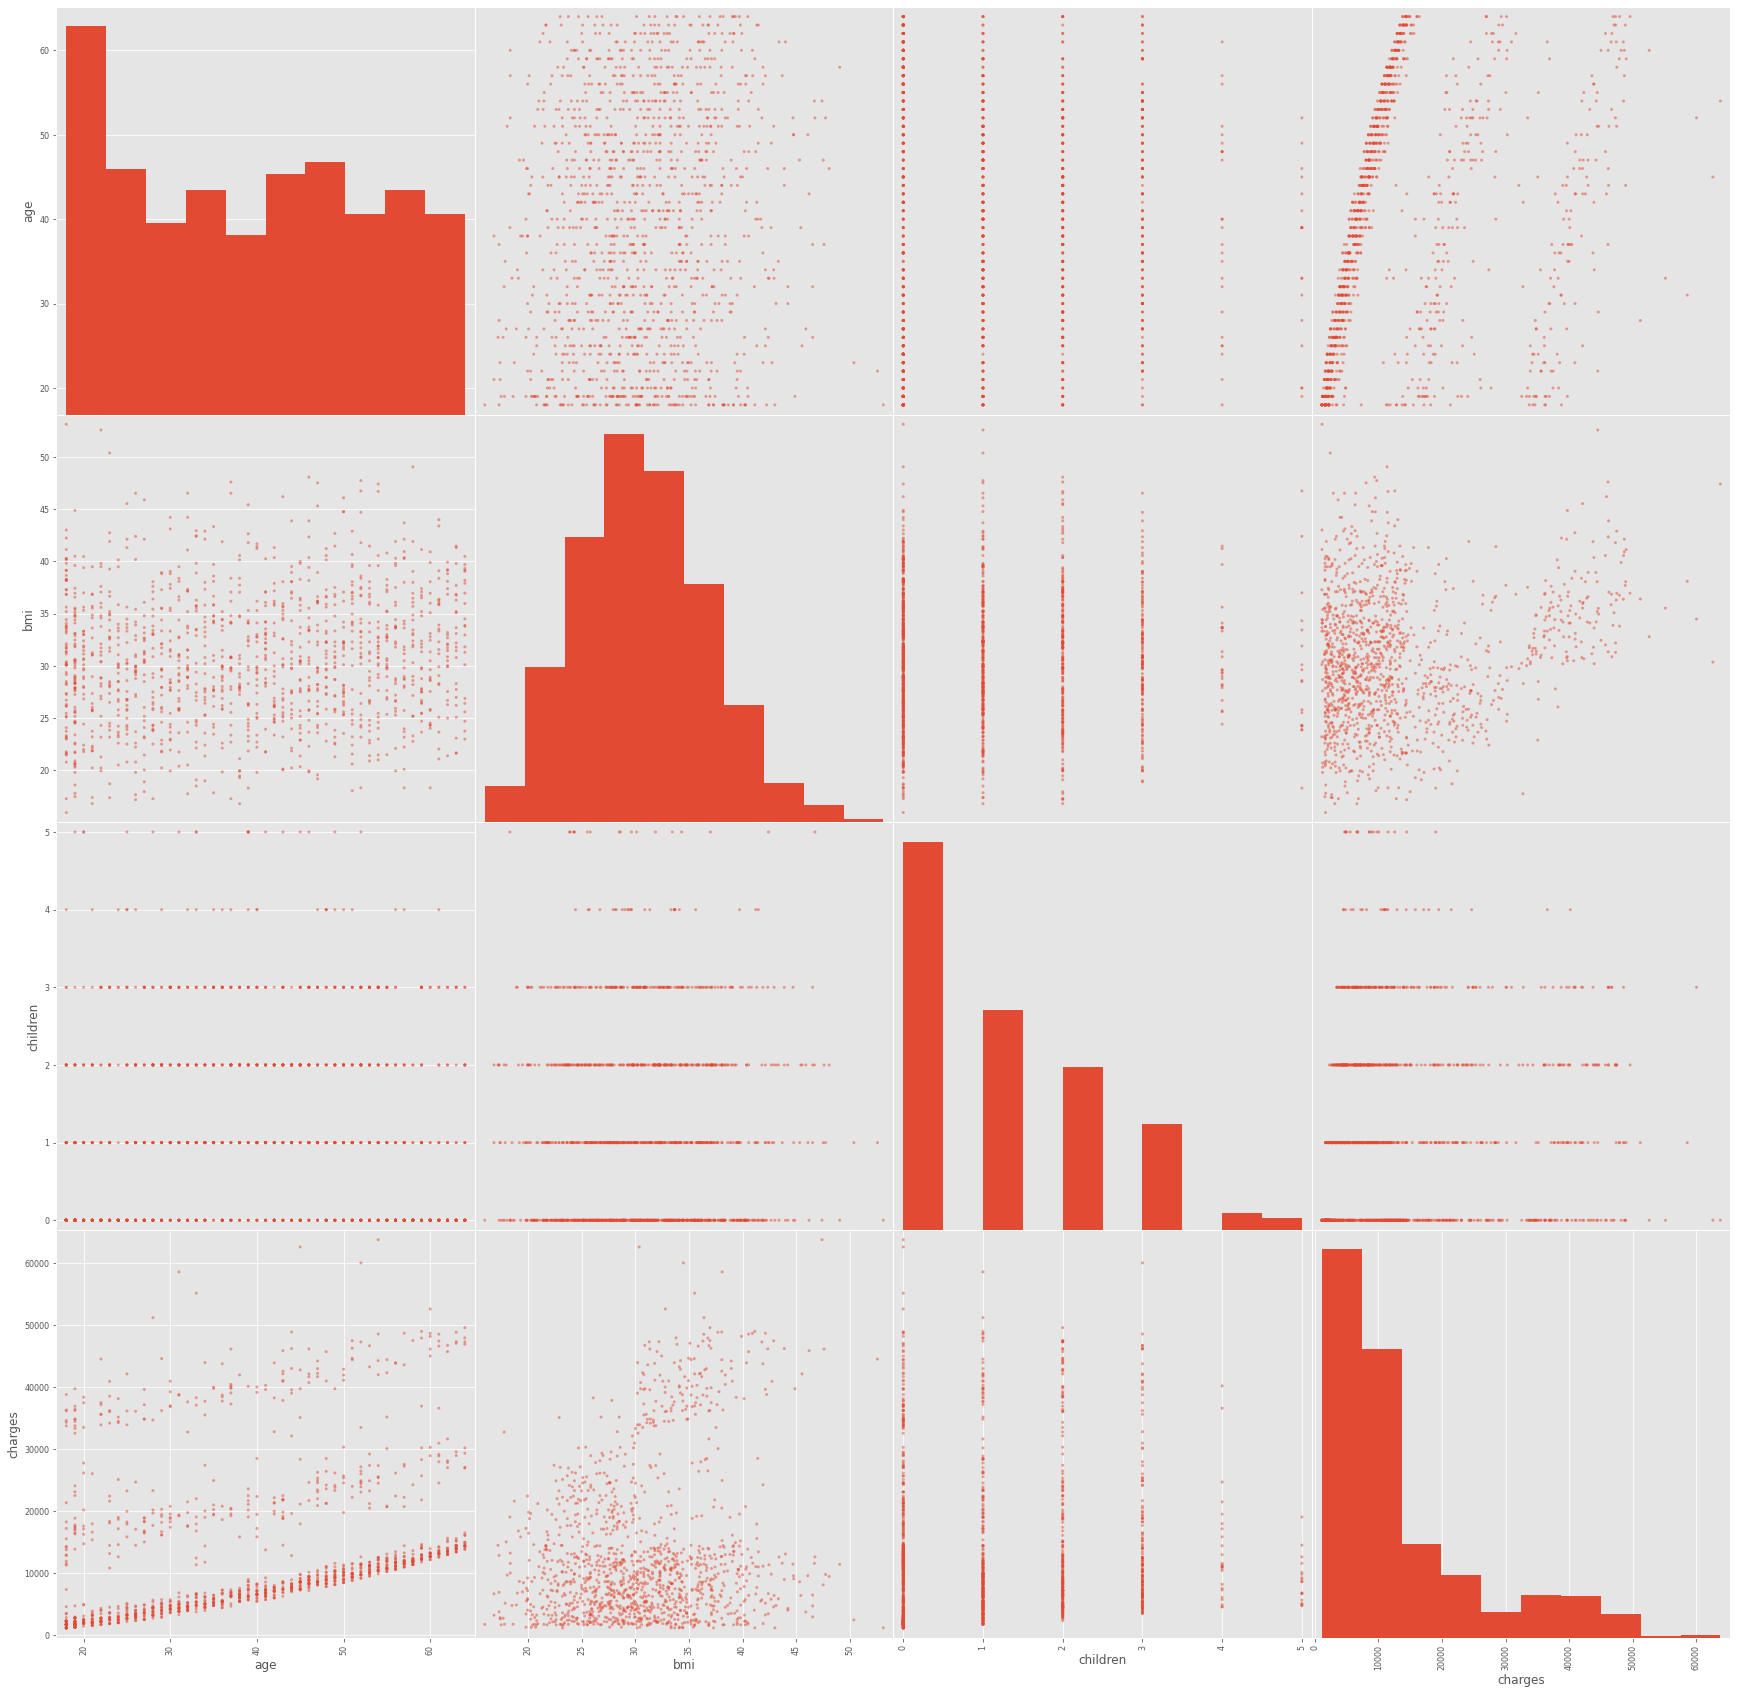

In [292]:
#scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(skr, figsize = (30,30))

Plots scatter plot only of numerical features data

y-axis shows the charges and x-axis shows the age and bmi and each dot represents a person in this dataset.

Above plot illustrates the relationship between two columns in the generating DataFrame. Each variable's histogram will be displayed on the matrix diagonal. With the help of this, it is possible to quickly examine the connections between the variables and spot any potential correlations or patterns in the data.

________________________________________________________________________________

shows the relationship between the children and charges columns in the skr DataFrame.

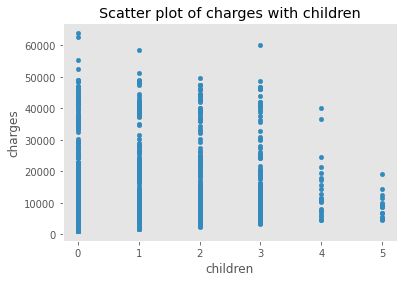

In [293]:
skr.plot.scatter(x= 'children', y= 'charges')    #plots the scatter plot   
plt.title('Scatter plot of charges with children')   #title for the plot                
plt.grid()   
plt.show() #displays the plot


In general, the above scatter plot is used to look at the connection between insurance costs and the number of children. A pattern or trend between the number of children and the charges, such as whether having more children tends to result in greater or lower charges.

________________________________________________________________________________

shows the distribution of the children column in the skr DataFrame.

Text(0.5, 1.0, 'Histogram of children')

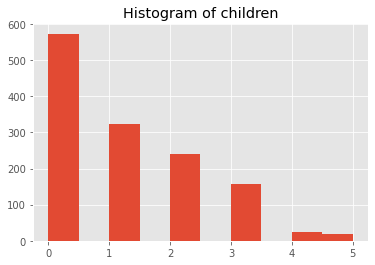

In [294]:
skr['children'].hist()  
plt.title('Histogram of children')


In general, the above histogram is used to examine how the children column in the skr DataFrame is distributed. The graphic demonstrates the distribution of the data over various child values. For instance, we can check to see if the data is evenly distributed or if some child populations are more strongly represented than others.

________________________________________________________________________________

 shows the relationship between two columns in the skr DataFrame: age and charges, bmi and charges, and smoker and charges.

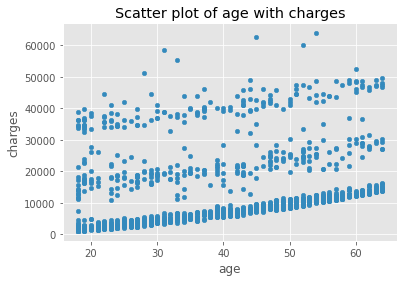

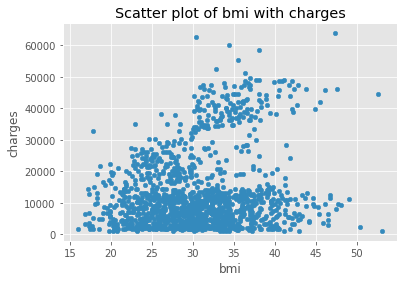

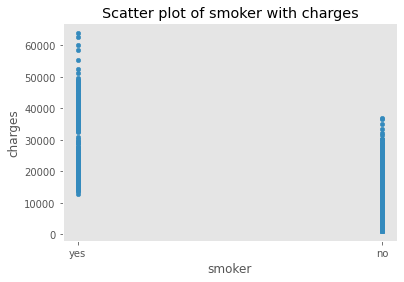

In [295]:
skr.plot.scatter(x= 'age', y= 'charges') 
plt.title('Scatter plot of age with charges')
skr.plot.scatter(x= 'bmi', y= 'charges')
plt.title('Scatter plot of bmi with charges')
skr.plot.scatter(x= 'smoker', y= 'charges')  
plt.title('Scatter plot of smoker with charges')    
                   
plt.grid()   
plt.show()


________________________________________________________________________________

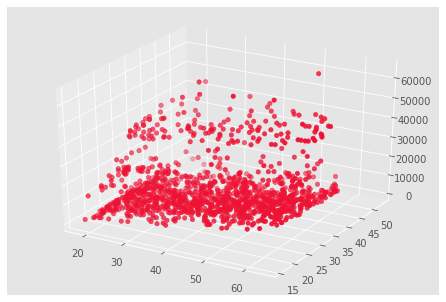

In [296]:
age = skr['age'].values
bmi = skr['bmi'].values
charges = skr['charges'].values
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(age, bmi, charges, color='#ef1234')
plt.show()

In this scatter plot, the dependent variable, charges, is on the y axis, and the other two independent variables, age and bmi, are on the x axis. The scatter plot I created using the three variables age, bmi, and charges looks like this.

________________________________________________________________________________

In [297]:
import plotly.express as px

fig = px.scatter(skr, x="age", y="charges", color="smoker")


fig.show()

By visualizing above plot each person has a set of dots, with their age on the x-axis, healthcare costs on the y-axis, and the color of the dot indicating whether they smoke or not (either smoker or non-smoker). We can also see the total costs along with age and are they smoker or not.

________________________________________________________________________________

In [298]:
# Import the Plotly Express library
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(skr, x="age", y="charges", z='smoker', color="smoker")

# Show the plot
fig.show()

In the above plot, we can see the 3D scatter plot between charges, smoker and age. It shows that if a person is smoker or not along with the age and their insurance costs.

________________________________________________________________________________

displays the relationship between the bmi and charges variables

In [299]:
import plotly.express as px

fig = px.scatter(skr, x="bmi", y="charges", color="smoker")


fig.show()

________________________________________________________________________________

In [300]:
# Import the Plotly Express library
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(skr, x="bmi", y="charges", z='smoker', color="smoker")

# Show the plot
fig.show()

The above 3D plot shows the plot between charges, bmi and smoker. We can see that individual who smokes, who has certain bmi has certain insurance charges. If the bmi of an individual is high then the cost is also high.

We can clearlt see that the person who does not smokes has less insurance costs.

________________________________________________________________________________

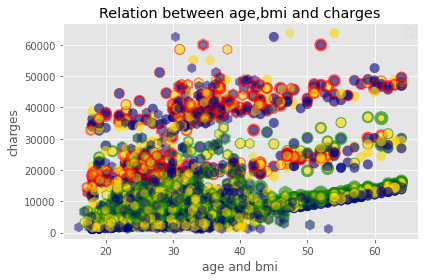

In [301]:
color = skr['sex'].apply(lambda x: 'navy' if x == 'male' else 'gold')
bcolor = skr['smoker'].apply(lambda x: 'red' if x == 'yes' else 'green') 

 

 
plt.style.use('ggplot')
 
plt.title('Relation between age,bmi and charges')
plt.xlabel('age and bmi')
plt.ylabel('charges')
plt.scatter(x=skr['age'],y=skr['charges'],s=100,c=color,alpha=0.6,marker='o',edgecolors=bcolor,linewidth=skr['children'])
plt.scatter(x=skr['bmi'],y=skr['charges'],s=100,c=color,alpha=0.5,marker='h',edgecolors=bcolor,linewidth=skr['children'])
 
plt.legend(loc='upper right')
 
 
plt.tight_layout()
 
plt.show()

The above plot shows the relation between age and bmi with charges in a scatter plot. 

________________________________________________________________________________

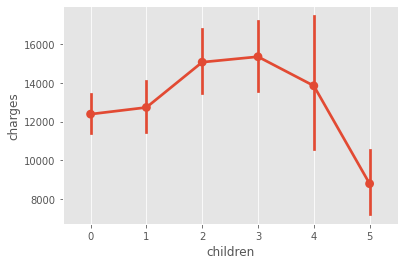

In [302]:
#The plot between children and charges
sns.pointplot(x = 'children', y = 'charges', data = skr)
plt.grid()
plt.show()

The above plot gives the information about the charges according to the number of children. We can see that if there are 5 children than the charge can be low and if there are 1 children then cost can we high. So, the charges varies or can cost low charge if there are less number of children.

________________________________________________________________________________

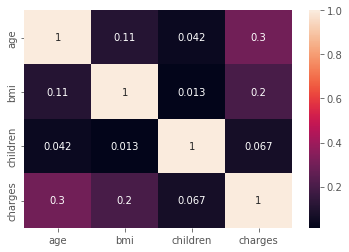

In [303]:
# from corr function we can find the correlation between the columns.
c = skr.corr()
c
# Plot the heatmap of the correlation matrix
sns.heatmap(c, annot=True)

# Show the plot
plt.show()



The above heatmap shows the correlation between each feature and the target variable. The values close to 1 indicate a strong positive correlation, and the values close to -1 indicate a strong negative correlation.

________________________________________________________________________________

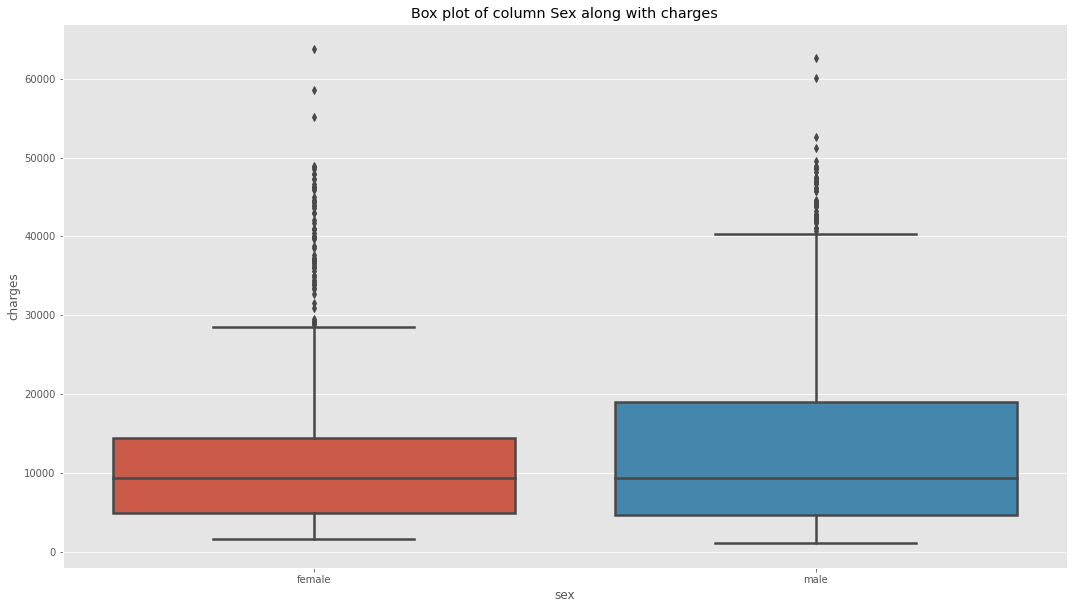

In [304]:
plt.figure(figsize = (18,10))
ax = sns.boxplot(x="sex" ,y="charges", data=skr, linewidth=2.5)
plt.title('Box plot of column Sex along with charges')    
plt.show()

A common type of graphic used in explanatory data analysis is the box plot. Box plots use the data's quartiles (or percentiles) and averages to visually depict the distribution of numerical data and skewness. This box plot compares the statistics between men and women in terms of the charges and results. When comparing the two variables, male and female, we can observe that male's average value is higher than female's, indicating that male's box plot in terms of charges is larger than female's. This demonstrates that men are more charged than women.

________________________________________________________________________________

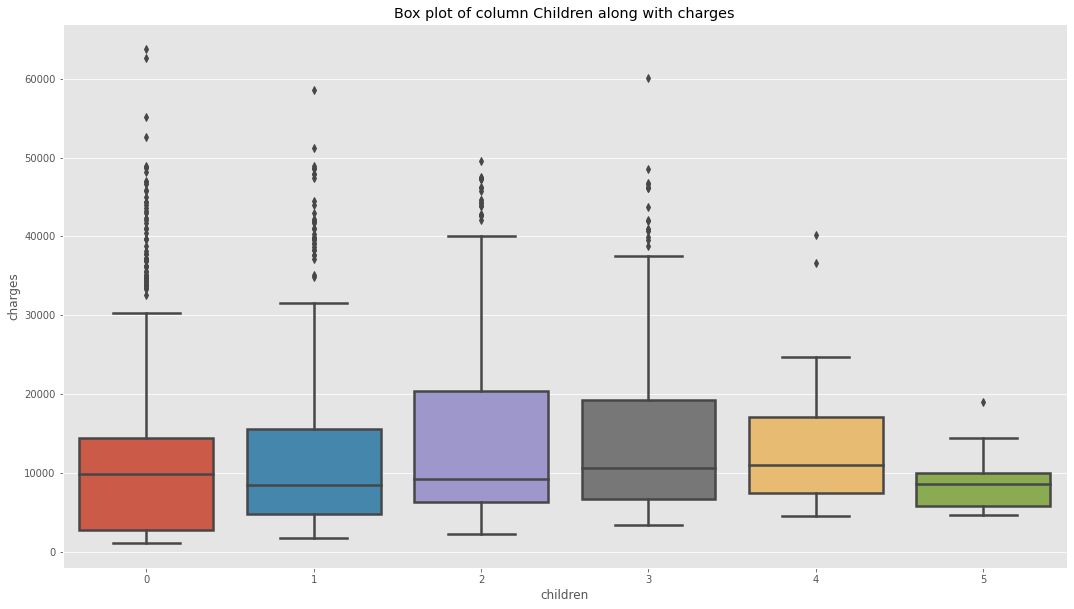

In [305]:
plt.figure(figsize = (18,10))
ax = sns.boxplot(x="children" ,y="charges", data=skr, linewidth=2.5)
plt.title('Box plot of column Children along with charges')    
plt.show()

By visualizing the above box plot we can see that the highest number of children is 5. The charges does not depend upon the number of children. We can see that people having 2 children has the maximum average charge. So, the charge can cost high if there are less number of children.

________________________________________________________________________________

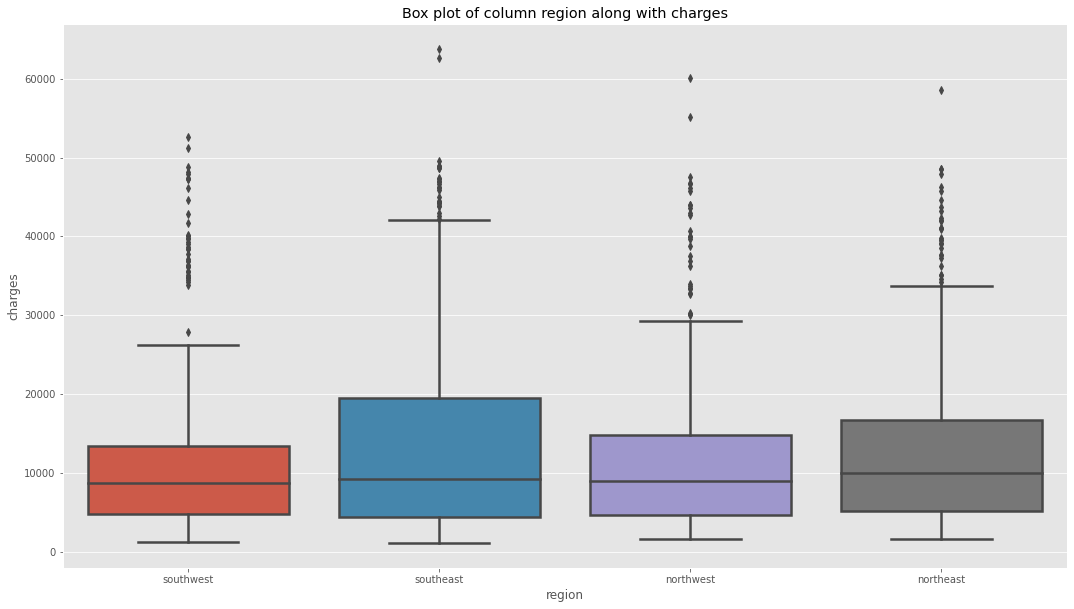

In [306]:
plt.figure(figsize = (18,10))
ax = sns.boxplot(x="region" ,y="charges", data=skr, linewidth=2.5)
plt.title('Box plot of column region along with charges')    
plt.show()

By seeing the above box plot, the people who lives in southeast US has the highest average charges among the other region.

________________________________________________________________________________

### Data Cleaning and Manipulation

We need to map the categorical data into numerical data 

In [307]:
skr.sex.unique()              # check the unique character

array(['female', 'male'], dtype=object)

In [308]:
skr.sex = skr.sex.map({"male":1, "female":0})   
     #this function is used to change the string value into float one.
skr

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [309]:
skr.smoker = skr.smoker.map({"yes":1, "no":0}) #mapping the data of smoker into numerical data
skr #displaying all the coumns of 'skr'

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [310]:
skr.region.unique()              # check the unique character

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

I've used this drop function to remove the columns of regions as part of the process of cleaning up the data and determining good accuracy.

In [311]:
skr.drop(['region', ], axis=1, inplace=True) #drop the colums
 

In [312]:
skr #displaying all the coumns of 'skr'

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


# Build Primary Model[Multiple Linear Regression][5]:

In [313]:
skr.describe() #seeing all the information of the column

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [314]:
skr.info() #gives the information about all the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 105.4 KB


In [315]:
# Dependent 
y = skr[['charges']]

In [316]:
# Independent 
X = skr.drop(['charges'], axis = 1)
print(X.shape) #prints the shape
print(X.columns) #prints the columns

(1337, 5)
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


In [317]:
# Define the LinearRegression class
class LinearRegression:
    # Initialize the class with a None weight attribute
    def __init__(self):
        self.weights = None

    # Fit the model to the training data
    def fit(self, X, y):
        # Add a column of ones to the X data for the y-intercept
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Calculate the weights using the closed-form solution for linear regression
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    # Predict the values for the test data
    def predict(self, X_test):
        # Add a column of ones to the X_test data for the y-intercept
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        # Return the predictions using the weights and the X_test data
        return X_test @ self.weights

In [318]:
from sklearn.preprocessing import StandardScaler #provides a way to standardize the features in a dataset

In [319]:
from sklearn.model_selection import train_test_split  #function to  splits a dataset into two subsets: a training set and a testing set

In [320]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print('Size of X_train = ', X_train.shape) #prints the shape of first train data
print('Size of X_test  = ', X_test.shape)  #prints the shape of first test data
print('Size of y_train = ', y_train.shape)  #prints the shape of second train data
print('Size of y_test  = ', y_test.shape)  #prints the shape of second test data

Size of X_train =  (802, 5)
Size of X_test  =  (535, 5)
Size of y_train =  (802, 1)
Size of y_test  =  (535, 1)


The test size argument is set to 0.4, indicating that 40% of the data should be utilized for testing. This calls the train test split function and passes in the features and target variable (X and y, respectively). Because the random state argument is set to 0, the same random split will be produced each time the code is executed.

The above code splits the data into training and testing sets with a 60/40 split, and assigns the resulting subsets to separate variables. 

# Model Evaluation[1]:

In [321]:
from sklearn.preprocessing import StandardScaler #to standardize the features in a dataset. 
sc = StandardScaler()  #creating the instance


In [322]:
X_train = sc.fit_transform(X_train) #Standardize the first train model
X_test = sc.transform(X_test) #Standardize the first test model

X_train.shape #displays the shape of the first train



(802, 5)

The above code standardizes the training and testing feature data, respectively.

In [323]:
#MLR model initialization and fitting
model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test) #predicts the model of the first test

In [324]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predict, y_test) #calculates the Mean Squarred Error 
print("Mean Squarred Error is :" ,mse) #prints the Mean Squarred Error

Mean Squarred Error is : 34584622.12971618


In [325]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(X_train, y_train) #fitting the model

linreg_pred = linreg.predict(X_test) #linear regression predictions

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ",rmse) #prints Root Mean Squared Error
print("r2Squared :", r2) #prints r2Squared
print(r2*100,"% accurate") #shows the accuracy of the test

Root Mean Squared Error :  5880.869164478681
r2Squared : 0.7643992635850185
76.43992635850185 % accurate


In [326]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_predict,y_test)
print("Mean Absolute Error is :" ,mae*100) #prints the Mean Absolute Error

Mean Absolute Error is : 401742.4756335708


# Dimensionality Reduction[6]:

In [327]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=4)

# Fit and transform the first_train data using the PCA instance
first_train1 = pca.fit_transform(X_train)

# Transform the first_test data using the PCA instance
first_test1 = pca.transform(X_test)

# Initialize an instance of the LinearRegression class
model1 = LinearRegression()

# Fit the model to the first_train and second_train data
model1.fit(first_train1, y_train)

# Make predictions on the first_test data
second_predict1 = model1.predict(first_test1)

In [328]:
# Create an instance of the LinearRegression class
linreg1 = LinearRegression()

# Fit the linear regression model to the first_train and second_train data
linreg1.fit(first_train1, y_train)

# Predict the second target variable using the linear regression model and the first_test data
linreg_pred1 = linreg1.predict(first_test1)

# Compute the mean squared error between the actual second_test values and the predicted linreg_pred values
mse1 = mean_squared_error(y_test, linreg_pred1)

# Compute the root mean squared error (RMSE) as the square root of the MSE
rmse1 = np.sqrt(mse1)

# Compute the r-squared score between the actual second_test values and the predicted linreg_pred values
r21 = r2_score(y_test, linreg_pred1)

# Calculating the mean absolute error between the predicted and actual target values
mae1 = mean_absolute_error(second_predict1, y_test)


# Print the RMSE and r-squared score
print("Mean Squared Error:", mse1)
print("Mean Absolute Error: {:.2f}%".format(mae1 * 100))
print("Root Mean Squared Error : ", rmse1)
print("r2Squared :", r21)

# Print the accuracy of the linear regression model on the test data
print(f"The accuracy on test set using Linear Regression(with PCA) is: {np.round(r21*100,3)}% ")

Mean Squared Error: 34528866.7216456
Mean Absolute Error: 399171.03%
Root Mean Squared Error :  5876.126846966938
r2Squared : 0.7647790860145156
The accuracy on test set using Linear Regression(with PCA) is: 76.478% 


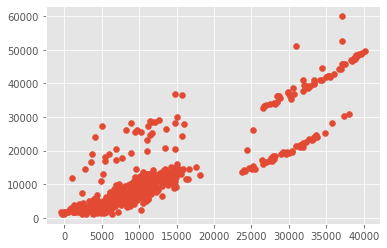

In [329]:
plt.scatter(y_predict, y_test)
plt.show()

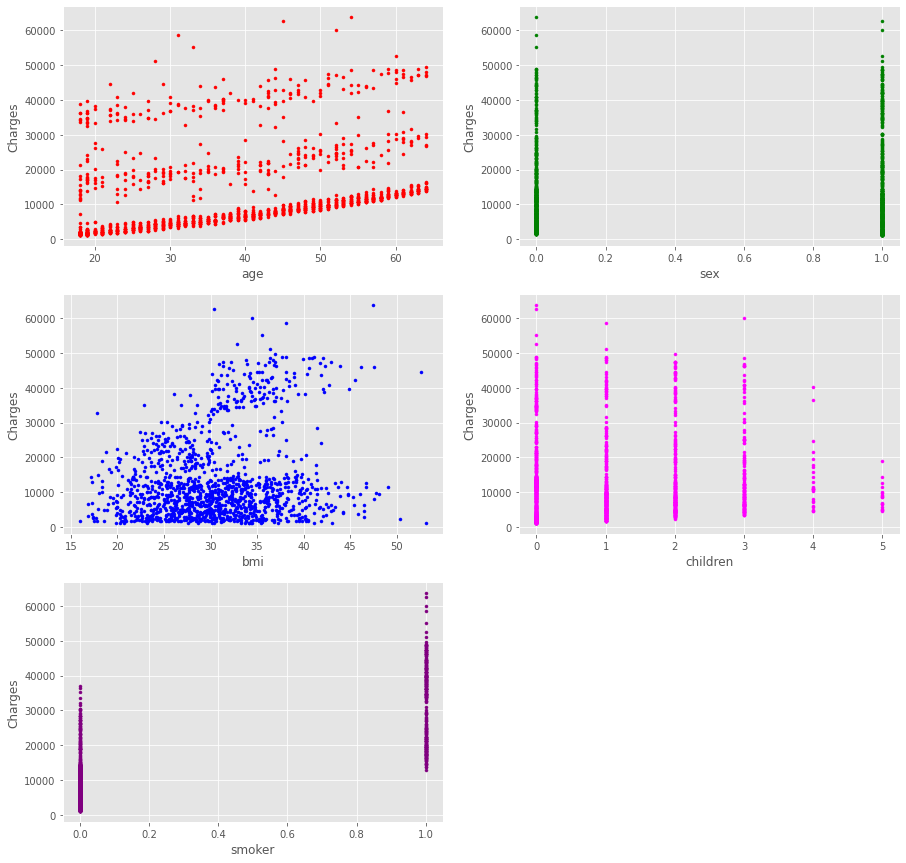

In [330]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15)) #plots scatter plot of the columns
gs = mpl.gridspec.GridSpec(3, 2) #plots in grid format
features = ["age","sex","bmi","children","smoker"] #all the features
colors = ["red", "green", "blue", "magenta", "purple"] #for the colors

for i in range(5):
    ax = fig.add_subplot(gs[i//2, i%2])
    ax.scatter(skr[features[i]], skr["charges"], color=colors[i], marker=".") #plots the scatter plot
    ax.set_xlabel(features[i]) #xlabel
    ax.set_ylabel("Charges") #ylabel

plt.show()



In [331]:
corelation_matrix = skr.corr() #store the correlation matrix 
print(corelation_matrix) #prints the corelation matrix

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.019814  0.109344  0.041536 -0.025587  0.298308
sex      -0.019814  1.000000  0.046397  0.017848  0.076596  0.058044
bmi       0.109344  0.046397  1.000000  0.012755  0.003746  0.198401
children  0.041536  0.017848  0.012755  1.000000  0.007331  0.067389
smoker   -0.025587  0.076596  0.003746  0.007331  1.000000  0.787234
charges   0.298308  0.058044  0.198401  0.067389  0.787234  1.000000


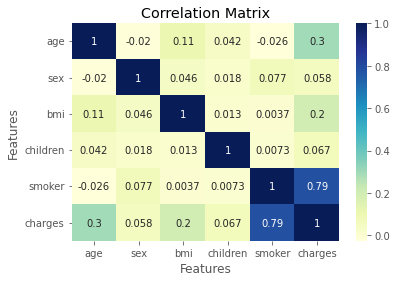

In [332]:
import seaborn as sns
sns.heatmap(corelation_matrix, annot=True, cmap = "YlGnBu")
# Add labels and titles to the plot
plt.title("Correlation Matrix") #for the title
plt.xlabel("Features") #xlabel
plt.ylabel("Features") #ylabel

# Show the plot
plt.show()


# Conclusion[1]:

I've conducted two evaluations. First, I standardized the data using a standard scalar, and my model's accuracy is 76.43 percent.
Second, I used PCA to reduce the model's dimensions, and the accuracy I achieved was 76.47 percent. When evaluating various models, my accuracy is remarkably similar. It's important to remember that PCA is just one of many preprocessing techniques that may be used on a dataset, and that its effects on the precision of the final model depend on the particular issue you are attempting to address. In general, it's a good idea to experiment with various preprocessing methods and evaluate how they affect the model's accuracy.
